## Multivariate Regression

### PS3 Week 11 Discussion - Clara Hu

This week we will be taking a look at some data from a 2018 study from the CDC on trends in mean weight, height, waist circumference, and body mass index (BMI) among adults in the United States from 1999 to 2016. If you are interested, you can read the full report [here](https://www.cdc.gov/nchs/data/nhsr/nhsr122-508.pdf).

Let's take a look at the data:

In [1]:
library(ggplot2)
library(estimatr)

data <- read.table("./data/waistweightheight.txt", header = TRUE)
head(data)

,Waistcm,wtKg,HTCm,gen,Waist,Height,Weight
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,71.5,65.6,174.0,1,28.15,68.50,144.65
2,79.0,71.8,175.3,1,31.10,69.02,158.32
3,83.2,80.7,193.5,1,32.76,76.18,177.94
4,77.8,72.6,186.5,1,30.63,73.43,160.08
5,80.0,78.8,187.2,1,31.50,73.70,173.75
6,82.5,74.8,181.5,1,32.48,71.46,164.93


Here is a quick rundown of what each column means:

- `Waistcm`: Waist circumference in centimenters (cm)
- `wtKg`: Weight in kilograms (kg)
- `HTCm`: Height in centimeters (cm)
- `gen`: 1 = male, 0 = female
- `Waist`: Waist circumference in inches (in)
- `Height`: Height in inches (in)
- `Weight`: Weight in pounds (lb)

We are interested in predicting weight based on other metrics.

### Bivariate Regression

Run a regression of `Weight` against `Height`.

In [2]:
# Type your code here
model1 = summary(lm(Weight ~ Height, data))
model1


Call:
lm(formula = Weight ~ Height, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-41.35 -14.11  -2.70  11.15  90.63 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -231.5074    16.6246  -13.93   <2e-16 ***
Height         5.6987     0.2464   23.13   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.53 on 505 degrees of freedom
Multiple R-squared:  0.5145,	Adjusted R-squared:  0.5135 
F-statistic: 535.1 on 1 and 505 DF,  p-value: < 2.2e-16


#### Given the estimates in the output, what would our equation to estimate `Weight` from `Height` be?  
*Recall: y = mx + b*

-231.5074 + 5.6987(Height) = Weight

#### Provide an interpretation of the estimate for the `(Intercept)` term and `Height` term.

*Type your notes here*

### Plot Bivariate Regression
Let's take a look at the performance of our model and plot weight against height.

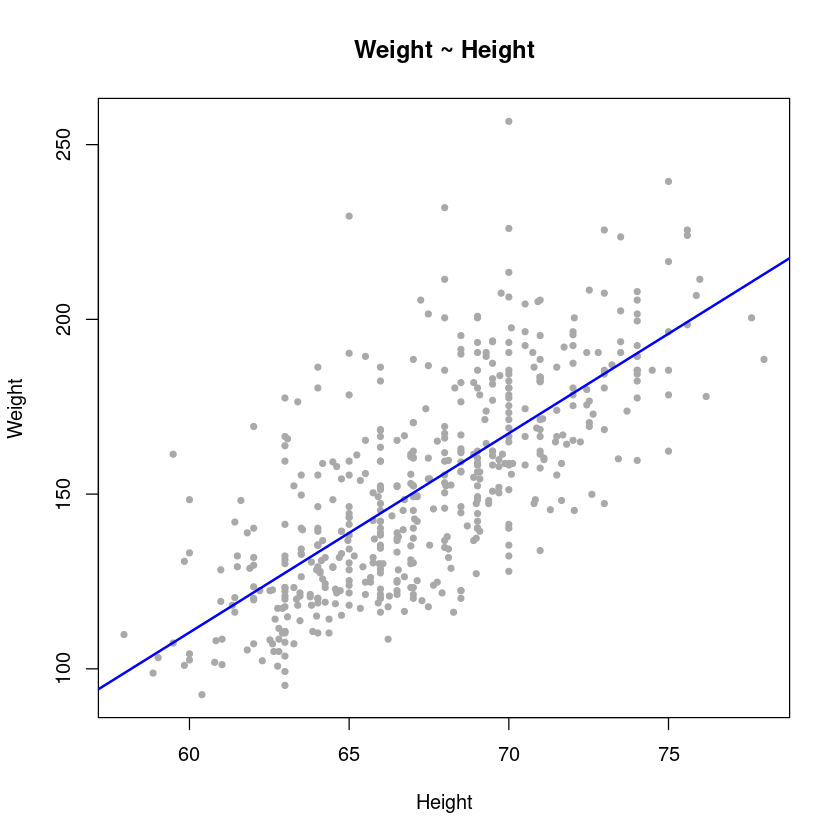

In [3]:
## Plot weight vs height data and bivariate model
plot(data$Height, data$Weight, pch = 20, col = 'darkgray', xlab = "Height", ylab = "Weight", main = "Weight ~ Height")
curve(model1$coefficients[2] * x + model1$coefficients[1], from=0, to=300, col = 'blue', lwd = 2, add = TRUE)

Our model for estimating weight looks pretty good, but there still seems to be a lot of noise in the data. 

We can also see from the output that our **R-squared is around 0.5**, which means there's room for improvement. Recall that the R-squared value is the proportion of variation in our data that is explained by our model.

### Multivariate Regression

We want to see how multivariate regression can help us try (not necessarily succeed) to reduce omitted variable bias when we explore predictors of weight.  

Run a regression of `Weight` against `Height` and `Waist`.

In [4]:
model2 = summary(lm(Weight ~ Height + Waist, data))
model2


Call:
lm(formula = Weight ~ Height + Waist, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.760  -6.405  -0.420   5.656  45.474 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -165.5332     8.2517  -20.06   <2e-16 ***
Height         2.4884     0.1438   17.30   <2e-16 ***
Waist          4.9605     0.1229   40.37   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.986 on 504 degrees of freedom
Multiple R-squared:  0.8853,	Adjusted R-squared:  0.8848 
F-statistic:  1945 on 2 and 504 DF,  p-value: < 2.2e-16


#### What would our equation to estimate `Weight` be with the additional variable?  

Weight = 2.4884(Height) + 4.9605(Waist) - 165.5332

#### Now, provide an interpretation of the estimate for the `Height` term.

*Type your notes here*

Notice how our R-squared for our new model has increased to about to about 0.88, meaning that more of the variation in the data is now explained by our model. 